In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

X, y = make_regression(100000,100,effective_rank=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=3)
X2D = pca.fit_transform(X_train)

In [2]:
pca.explained_variance_ratio_

array([0.24086257, 0.1808738 , 0.09715335])

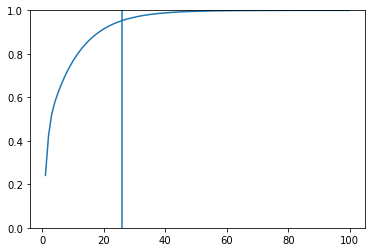

In [3]:
# find dimension that give 95% of variance
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1
plt.plot(np.arange(len(cumsum))+1, cumsum)
plt.ylim(0,1)
plt.axvline(x=d)

In [4]:
# same thing, but way less work
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(X_train)
print(x_reduced.shape)

(80000, 26)


In [5]:
# run way faster O(m x d^2) + O(d^3) rather than O(m x n^2) + O(n^3)
# with d as the reduced dimension, m as the instances, and n as inputs
rnd_pca = PCA(n_components=26, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
print(np.sum(pca.explained_variance_ratio_))

# for incromental/on the fly use IncrementalPCA

0.9532010386454087


In [6]:
# numpy has a memmap fuctions that allows for arrays 
# to be stored on disk and loaded when neededd!!!

In [7]:
from sklearn.decomposition import KernelPCA
X, y = make_regression(1000,10,effective_rank=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# using kernels (rbf in this case) to do PCA
rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.04)
x_reduced = rbf_pca.fit_transform(X_train)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
X, y = make_regression(10000,10,effective_rank=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = Pipeline([
    ('kpca', KernelPCA(n_components = 2)),
    ('log_reg', LogisticRegression())
])
param_grid = [{
    'kpca__gamma': np.linspace(0.03,0.05,10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuou

ValueError: Unknown label type: 'continuous'

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X_train)